In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from fit_test import bk_model_stand_alone

2023-12-08 10:49:17.720009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/cuba
2023-12-08 10:49:17.720049: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_dir = '/home/swang/share/rneveux/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/stable/'
name_file = {
    'Pk':{'0':os.path.join(data_dir,'powspec/pk0_CubicBox_rsd_phmean_kpk'),
         '2':os.path.join(data_dir,'powspec/pk2_CubicBox_rsd_phmean_kpk'),
         '4':os.path.join(data_dir,'powspec/pk4_CubicBox_rsd_phmean_kpk'),},
    'Bk':{'000':os.path.join(data_dir,'bispec/bk000_CubicBox_rsd_phmean_kbk'),
         '202':os.path.join(data_dir,'bispec/bk202_CubicBox_rsd_phmean_kbk'),
          'nostoch_000':os.path.join(data_dir,'bispec/bk000_diag_CubicBox_rsd_phmean_kbksubshot'),
         'nostoch_202':os.path.join(data_dir,'bispec/bk202_diag_CubicBox_rsd_phmean_kbksubshot'),}}
cov_file = os.path.join('/home/rneveux/covariance_matrix',
                        'cov_FirstGenMocks_EZmock_Cubic_LRG_z0.800_pk0_pk2_pk4_bk000_bk202.npy')

bk_data = {'000':np.loadtxt(name_file['Bk']['000'])}
bk_data['202'] = np.loadtxt(name_file['Bk']['202'])
bk_data ['nostoch_000'] = np.loadtxt(name_file['Bk']['nostoch_000'])
bk_data['nostoch_202'] = np.loadtxt(name_file['Bk']['nostoch_202'])
pk_data = {'0':np.loadtxt(name_file['Pk']['0'])}
pk_data['2'] = np.loadtxt(name_file['Pk']['2'])

In [34]:
k = np.array([0.01159058, 0.02081665, 0.03048062, 0.04036437, 0.05036595,
       0.06034213, 0.0702755 , 0.08021871, 0.09019841, 0.10017723,
       0.11014627, 0.12013268, 0.13012506, 0.14012919, 0.15012158,
       0.16013557, 0.1701332 , 0.18010434, 0.19008708, 0.20007673])
directory = '/home/rneveux/fit_results/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/'
bk_024_noprior = np.load(os.path.join(directory,'Pk_Bk_0_2_4_000_202_kmin2_kmaxpk18_kmaxbk8_rescaled25_fnl_noprior.npy'),allow_pickle=True).item()
bk_02_disc = np.load(os.path.join(directory,'Bk_000_202_test_discrete_factor.npy'),allow_pickle=True).item()
bk_02_disc_nosub = np.load(os.path.join(directory,'Bk_000_202_test_discrete_factor_noshot.npy'),allow_pickle=True).item()
test = np.load(os.path.join(directory,'Bk_000_202_rescaled25_all_biases.npy'),allow_pickle=True).item()

bias_params = {}
bias_params_test = {}
for j,i in enumerate(bk_02_disc['params_fit_sorted']):
    bias_params[i] = bk_02_disc['max_logposterior'][j]
    bias_params_test[i] = test['max_logposterior'][j]
bias_nosub_params = {}
for j,i in enumerate(bk_02_disc_nosub['params_fit_sorted']):
    bias_nosub_params[i] = bk_02_disc_nosub['max_logposterior'][j]

In [5]:
bk_model = {}
bk_model_h = {}
bk_model_h4 = {}
bk_model_h5 = {}
for ell in ['000','202']:
    bk_model[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02', ell=ell, ortho_LSS=True, **bias_params)
    bk_model_h[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle', ell=ell, ortho_LSS=True, **bias_params)
    bk_model_h4[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle_h3', ell=ell, ortho_LSS=True, **bias_params)
    bk_model_h5[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle_h3_h', ell=ell, ortho_LSS=True, **bias_params)

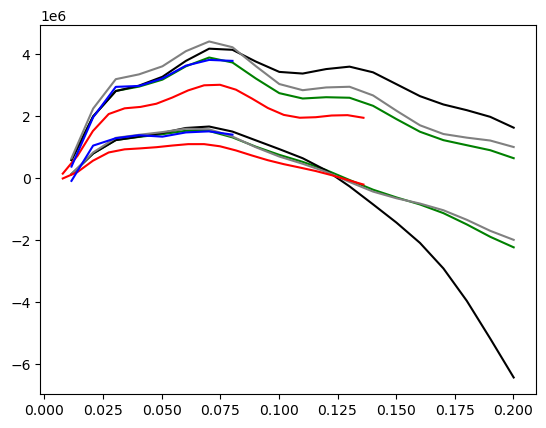

In [25]:
for ell in ['000','202']:
    plt.plot(k,k**2*bk_model[ell], color='g')
    plt.plot(k,k**2*bk_model_h[ell], color='k')
    plt.plot(k,k**2*bk_model_h4[ell], color='grey')
    plt.plot(k*.68,k**2*bk_model_h5[ell]*.68**3, color='r')
    plt.plot(bk_data[ell][:8,0], bk_data[ell][:8,0]**2*bk_data[ell][:8,1], color='b')

In [8]:
directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02'
directory_h = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle'
directory_h4 = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle_h3'
directory_h5 = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle_h3_h'

In [9]:
b1 = np.load(os.path.join(directory,'000/tree/b1_b1_b1.npy'), allow_pickle=True).item()
b1_h = np.load(os.path.join(directory_h,'000/tree/b1_b1_b1.npy'), allow_pickle=True).item()
b1_h4 = np.load(os.path.join(directory_h4,'000/tree/b1_b1_b1.npy'), allow_pickle=True).item()
b1_h5 = np.load(os.path.join(directory_h5,'000/tree/b1_b1_b1.npy'), allow_pickle=True).item()

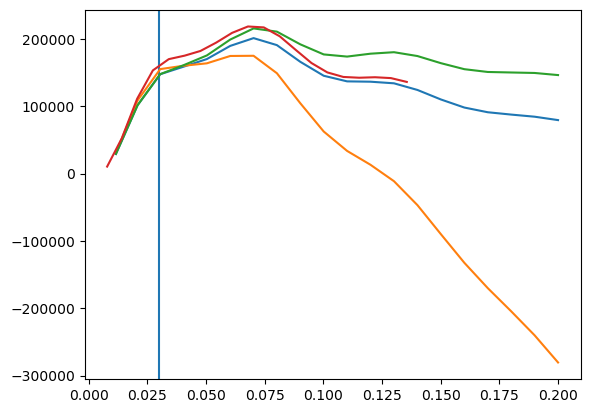

In [45]:
plt.plot(b1['kbin'], b1['kbin']**2*b1['K'])
#plt.plot(b1['kbin'], b1_h['K']/b1['K'])
#plt.plot(b1['kbin'], b1_h4['K']/b1['K'])
plt.axvline(.03)
plt.plot(b1['kbin'], b1['kbin']**2*(b1_h4['K']-9000000))
plt.plot(b1['kbin'], b1['kbin']**2*b1_h['K'])
plt.plot(b1_h5['kbin'], b1_h5['kbin']**2*b1_h5['K'])

In [35]:
bk_model = {}
bk_nosub_model = {}
for ell in ['000','202']:
    bk_model[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02', ell=ell, ortho_LSS=True, **bias_params)
    bk_nosub_model[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02', ell=ell, ortho_LSS=True, **bias_nosub_params)
test_model = {}
for ell in ['000','202']:
    test_model[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20', ell=ell, ortho_LSS=True, **bias_params_test)

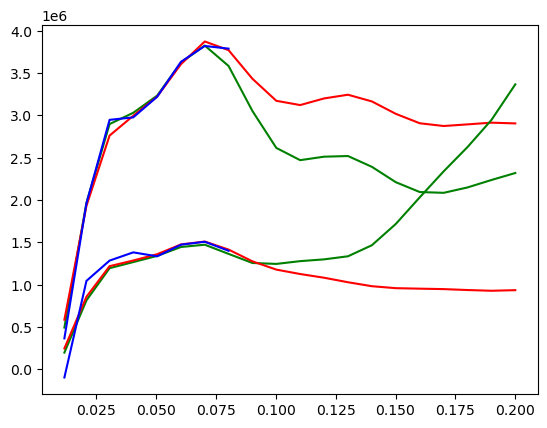

In [37]:
for ell in ['000','202']:
    plt.plot(k,k**2*bk_model[ell], color='g')
    plt.plot(k,k**2*test_model[ell], color='r')
    plt.plot(bk_data[ell][:8,0], bk_data[ell][:8,0]**2*bk_data[ell][:8,1], color='b')

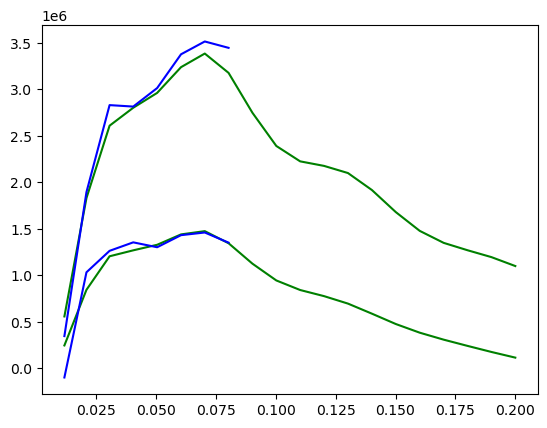

In [14]:
for ell in ['000','202']:
    plt.plot(k,k**2*bk_nosub_model[ell], color='g')
    plt.plot(bk_data['nostoch_'+ell][:8,0], bk_data['nostoch_'+ell][:8,0]**2*bk_data['nostoch_'+ell][:8,1], color='b')

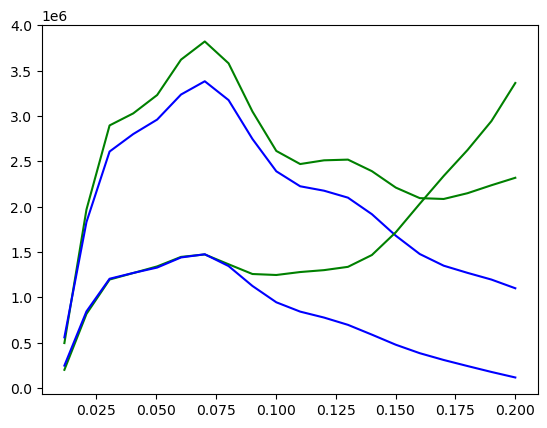

In [15]:
for ell in ['000','202']:
    plt.plot(k,k**2*bk_model[ell], color='g')
    plt.plot(k,k**2*bk_nosub_model[ell], color='b')

In [30]:
-2*np.max(bk_02_disc['sampler']['loglikelihood'])/(12-7)

1.0787775039672851

In [29]:
bk_02_disc['params_fit_sorted']

['b1', 'b2', 'bG2', 'c1', 'c2', 'Pshot', 'Bshot']

In [32]:
-2*np.max(test['sampler']['loglikelihood'])/(12-7)

3.9040855407714843

In [33]:
test['params_fit_sorted']

['b1', 'b2', 'bG2', 'c1', 'c2', 'Pshot', 'Bshot']

In [38]:
bias_params

{'b1': 2.0901253,
 'b2': -3.0650249,
 'bG2': -3.2754009,
 'c1': -69.89317,
 'c2': 111.51885,
 'Pshot': -9.884163,
 'Bshot': -4.811363}

In [39]:
bias_params_test

{'b1': 1.850146,
 'b2': 2.014195,
 'bG2': 0.6369713,
 'c1': -54.972088,
 'c2': 73.35677,
 'Pshot': -4.9853783,
 'Bshot': -2.0288413}